In [1]:
# Check GPU Status in Google Colob or Local Machine
!nvidia-smi  # For GPU


Mon May  5 10:26:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Check if GPU is available with pytorch
import torch
print(torch.cuda.is_available()) # True if GPU is avilable

True


In [3]:
from google.colab import drive  # for mounting google drive if needed
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

def clip(value):
    return min(max(float(value), 0.0), 1.0)

# Define paths for all label directories
base_dir = '/content/drive/MyDrive/360DigiTMG_Project_265_CV/YOLOv8s-seg/Yolo format'
label_dirs = ['train/labels', 'val/labels', 'test/labels']  # Modify if test folder doesn't exist

fixed_total = 0

for dir_name in label_dirs:
    label_path = os.path.join(base_dir, dir_name)
    if not os.path.exists(label_path):
        print(f"⚠️ Skipping missing directory: {label_path}")
        continue

    fixed_count = 0
    for file in os.listdir(label_path):
        if not file.endswith('.txt'):
            continue

        full_path = os.path.join(label_path, file)

        with open(full_path, 'r') as f:
            lines = f.readlines()

        corrected_lines = []
        needs_fix = False

        for line in lines:
            parts = line.strip().split()
            if len(parts) < 2:
                continue  # skip bad lines

            class_id = parts[0]
            coords = [clip(val) for val in parts[1:]]

            if any(float(val) < 0.0 or float(val) > 1.0 for val in parts[1:]):
                needs_fix = True

            corrected_line = ' '.join([class_id] + [f'{val:.6f}' for val in coords])
            corrected_lines.append(corrected_line)

        if needs_fix:
            with open(full_path, 'w') as f:
                f.write('\n'.join(corrected_lines) + '\n')
            fixed_count += 1
            print(f'✅ Fixed: {dir_name}/{file}')

    print(f'📁 {dir_name}: {fixed_count} files corrected.\n')
    fixed_total += fixed_count

print(f'🎉 All done! Total corrected label files: {fixed_total}')


✅ Fixed: train/labels/g15_aug_8.txt
✅ Fixed: train/labels/as2_aug_2.txt
✅ Fixed: train/labels/gd (13)_aug_11.txt
✅ Fixed: train/labels/gd 29_aug_4.txt
✅ Fixed: train/labels/g15_aug_15.txt
✅ Fixed: train/labels/b28_aug_6.txt
✅ Fixed: train/labels/as6_aug_6.txt
✅ Fixed: train/labels/gd 29_aug_12.txt
✅ Fixed: train/labels/gd (28)_aug_7.txt
✅ Fixed: train/labels/as19_aug_12.txt
✅ Fixed: train/labels/as19_aug_4.txt
✅ Fixed: train/labels/fe16_aug_5.txt
✅ Fixed: train/labels/fe1_aug_6.txt
✅ Fixed: train/labels/fe10_aug_10.txt
✅ Fixed: train/labels/hp (9)_aug_15.txt
✅ Fixed: train/labels/gd (8)_aug_10.txt
✅ Fixed: train/labels/c10_aug_3.txt
✅ Fixed: train/labels/gd (8)_aug_4.txt
✅ Fixed: train/labels/g15_aug_11.txt
📁 train/labels: 19 files corrected.

✅ Fixed: val/labels/g16_aug_1.txt
✅ Fixed: val/labels/gd (11)_aug_7.txt
✅ Fixed: val/labels/gd (20)_aug_8.txt
✅ Fixed: val/labels/gd (7)_aug_13.txt
✅ Fixed: val/labels/c10_aug_1.txt
✅ Fixed: val/labels/gd (1)_aug_4.txt
✅ Fixed: val/labels/gd (13)

In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
from ultralytics import YOLO # Import YOLOv8 model from Ultralytics

# Load the YOLOv8 segmentation model
model = YOLO("yolov5m.pt") # Load the pre-trained YOLOv8 model

PRO TIP 💡 Replace 'model=yolov5m.pt' with new 'model=yolov5mu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [3]:
# Train the YOLOv8 model
results = model.train(
    data = "/content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/data.yaml",  # Path to dataset YAML file
    epochs = 30,           # Number of epochs
    imgsz = 640,           # Image size
    batch = 6,             # Batch size
    lr0 = 0.001,            # Initial learning rate
    workers = 2,           # Number of data loader workers
    optimizer = "AdamW",     # Optimizer (SGD or Adam)
    patience = 5,         # stop if no improvement for 5 epochs
    device = 0        # Device to use (0 for GPU, 'cpu' for CPU)
)

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=6, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov5m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=5, perspe

train: Scanning /content/drive/.shortcut-targets-by-id/1As4A4rdT4EGG8lRf4pjXATPf5lEgZD8n/YOLOv5/Yolo format/train/labels... 2236 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2236/2236 [14:41<00:00,  2.54it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1As4A4rdT4EGG8lRf4pjXATPf5lEgZD8n/YOLOv5/Yolo format/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.0±0.8 ms, read: 0.5±0.5 MB/s, size: 240.8 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1As4A4rdT4EGG8lRf4pjXATPf5lEgZD8n/YOLOv5/Yolo format/val/labels... 639 images, 0 backgrounds, 0 corrupt: 100%|██████████| 639/639 [03:47<00:00,  2.81it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1As4A4rdT4EGG8lRf4pjXATPf5lEgZD8n/YOLOv5/Yolo format/val/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.000515625), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.59G      1.384      2.538      1.559         20        640: 100%|██████████| 373/373 [02:18<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:22<00:00,  2.41it/s]


                   all        639       2285       0.26      0.383      0.218       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.87G      1.368      2.291      1.576         16        640: 100%|██████████| 373/373 [01:26<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.72it/s]


                   all        639       2285      0.394      0.456      0.375       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.87G       1.34      2.137      1.553         22        640: 100%|██████████| 373/373 [01:25<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.97it/s]


                   all        639       2285      0.431      0.491      0.473      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.93G      1.273      1.934        1.5         41        640: 100%|██████████| 373/373 [01:25<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:09<00:00,  5.71it/s]

                   all        639       2285      0.512      0.574      0.563      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.99G       1.19      1.718      1.443         13        640: 100%|██████████| 373/373 [01:26<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.93it/s]

                   all        639       2285       0.62      0.637      0.675      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.04G      1.111       1.56      1.374         19        640: 100%|██████████| 373/373 [01:25<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.01it/s]

                   all        639       2285       0.68      0.677      0.735      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.05G      1.058      1.438      1.345         10        640: 100%|██████████| 373/373 [01:24<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:09<00:00,  5.74it/s]


                   all        639       2285      0.673      0.751       0.78      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.05G     0.9864       1.27      1.279         12        640: 100%|██████████| 373/373 [01:24<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.21it/s]

                   all        639       2285      0.738      0.717        0.8      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.05G     0.9475      1.202      1.255         14        640: 100%|██████████| 373/373 [01:24<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.05it/s]


                   all        639       2285        0.8      0.811      0.871      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.05G     0.9071      1.092      1.238         31        640: 100%|██████████| 373/373 [01:24<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:09<00:00,  5.49it/s]

                   all        639       2285      0.837      0.798      0.898       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.05G     0.8503     0.9973      1.196         32        640: 100%|██████████| 373/373 [01:25<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:09<00:00,  5.66it/s]


                   all        639       2285      0.833      0.854      0.902      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.05G     0.8232      0.948      1.168         17        640: 100%|██████████| 373/373 [01:24<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.17it/s]

                   all        639       2285      0.861      0.851      0.913      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.05G     0.8083     0.8959       1.16         35        640: 100%|██████████| 373/373 [01:24<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.05it/s]

                   all        639       2285      0.905      0.866      0.946      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.05G     0.7674     0.8426      1.131         38        640: 100%|██████████| 373/373 [01:25<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:09<00:00,  5.84it/s]


                   all        639       2285      0.898      0.883      0.945      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.05G     0.7455     0.8103      1.121         36        640: 100%|██████████| 373/373 [01:24<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.07it/s]

                   all        639       2285      0.904        0.9      0.961      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.05G     0.7165      0.735      1.097         23        640: 100%|██████████| 373/373 [01:25<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:09<00:00,  5.40it/s]


                   all        639       2285      0.917       0.91      0.963       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.05G     0.7021     0.7164      1.094         20        640: 100%|██████████| 373/373 [01:24<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:09<00:00,  5.50it/s]


                   all        639       2285      0.941      0.909      0.966      0.852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.05G     0.6743     0.6803      1.073         29        640: 100%|██████████| 373/373 [01:25<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:09<00:00,  5.81it/s]


                   all        639       2285      0.918      0.912      0.971      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.05G     0.6609     0.6749       1.07         21        640: 100%|██████████| 373/373 [01:24<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.20it/s]


                   all        639       2285      0.952      0.931      0.979      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.05G     0.6409      0.625      1.055         41        640: 100%|██████████| 373/373 [01:24<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.07it/s]

                   all        639       2285      0.951      0.931      0.975      0.877


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.05G     0.5277     0.4999     0.9727          8        640: 100%|██████████| 373/373 [01:24<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.13it/s]


                   all        639       2285      0.948      0.927      0.977      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.05G     0.4947     0.4451     0.9501         21        640: 100%|██████████| 373/373 [01:23<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:09<00:00,  5.41it/s]

                   all        639       2285      0.962      0.929       0.98      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.05G     0.4736     0.4237     0.9335         19        640: 100%|██████████| 373/373 [01:24<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.92it/s]

                   all        639       2285      0.963      0.935      0.982      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.05G     0.4527     0.3813     0.9261          6        640: 100%|██████████| 373/373 [01:23<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.05it/s]

                   all        639       2285      0.969      0.948      0.985      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.11G     0.4412     0.3721     0.9189         13        640: 100%|██████████| 373/373 [01:24<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:09<00:00,  5.90it/s]


                   all        639       2285      0.968      0.953      0.985      0.913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.11G     0.4156     0.3372     0.9001         14        640: 100%|██████████| 373/373 [01:23<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.08it/s]

                   all        639       2285      0.968      0.954      0.986      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.11G     0.3934     0.3221     0.8904         12        640: 100%|██████████| 373/373 [01:23<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:09<00:00,  5.75it/s]

                   all        639       2285      0.978      0.954      0.987      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.11G     0.3749     0.3023     0.8824          8        640: 100%|██████████| 373/373 [01:24<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.84it/s]


                   all        639       2285      0.974      0.961      0.987      0.932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.11G     0.3607     0.2934     0.8795         18        640: 100%|██████████| 373/373 [01:24<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.91it/s]

                   all        639       2285       0.98      0.962      0.987      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.11G     0.3505     0.2833     0.8682         13        640: 100%|██████████| 373/373 [01:23<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.20it/s]

                   all        639       2285      0.975      0.968      0.988       0.94



30 epochs completed in 0.860 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 50.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5m summary (fused): 106 layers, 25,050,427 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.66it/s]


                   all        639       2285      0.975      0.968      0.988       0.94
          Gas Cylinder         53        322      0.963      0.969      0.989      0.929
      Fire Extingusher         51        196      0.963      0.931      0.978      0.918
Hydraulic/Pneaumatic cylinder        110        242      0.957      0.963      0.981      0.878
Aerosil cans/Paint tins         56        259      0.967      0.969      0.988      0.961
           Compressors         61        237      0.987      0.967      0.987      0.948
           Oil Filters         72        214      0.968      0.979      0.993      0.967
      Fuel tanks/ Cans        118        262      0.996      0.975      0.987       0.96
             Batteries         74        273      0.989      0.971      0.994      0.964
     Ammunition Shells         56        280      0.984      0.989      0.994      0.937
Speed: 0.2ms preprocess, 6.5ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to run

In [4]:
# Validation
print("\n✅ Validating the model on validation dataset...")
val_results = model.val()

# Output validation results
print("\n📊 Validation Metrics Summary:")
print(f"✅ mAP@0.5       : {val_results.box.map50:.4f}")
print(f"✅ mAP@0.5:0.95  : {val_results.box.map:.4f}")
print(f"✅ Precision     : {val_results.box.mp:.4f}")
print(f"✅ Recall        : {val_results.box.mr:.4f}")



✅ Validating the model on validation dataset...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5m summary (fused): 106 layers, 25,050,427 parameters, 0 gradients, 64.0 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 42.9±38.6 MB/s, size: 84.1 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1As4A4rdT4EGG8lRf4pjXATPf5lEgZD8n/YOLOv5/Yolo format/val/labels.cache... 639 images, 0 backgrounds, 0 corrupt: 100%|██████████| 639/639 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:18<00:00,  5.94it/s]


                   all        639       2285      0.974      0.968      0.988      0.941
          Gas Cylinder         53        322      0.963      0.967      0.989       0.93
      Fire Extingusher         51        196      0.963      0.931      0.978      0.919
Hydraulic/Pneaumatic cylinder        110        242      0.957      0.963      0.981      0.875
Aerosil cans/Paint tins         56        259      0.967      0.969      0.988      0.962
           Compressors         61        237      0.987      0.967      0.987      0.949
           Oil Filters         72        214      0.968      0.979      0.993      0.968
      Fuel tanks/ Cans        118        262      0.996      0.975      0.987       0.96
             Batteries         74        273      0.981      0.971      0.994      0.963
     Ammunition Shells         56        280      0.984      0.989      0.994      0.938
Speed: 0.4ms preprocess, 17.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to ru

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


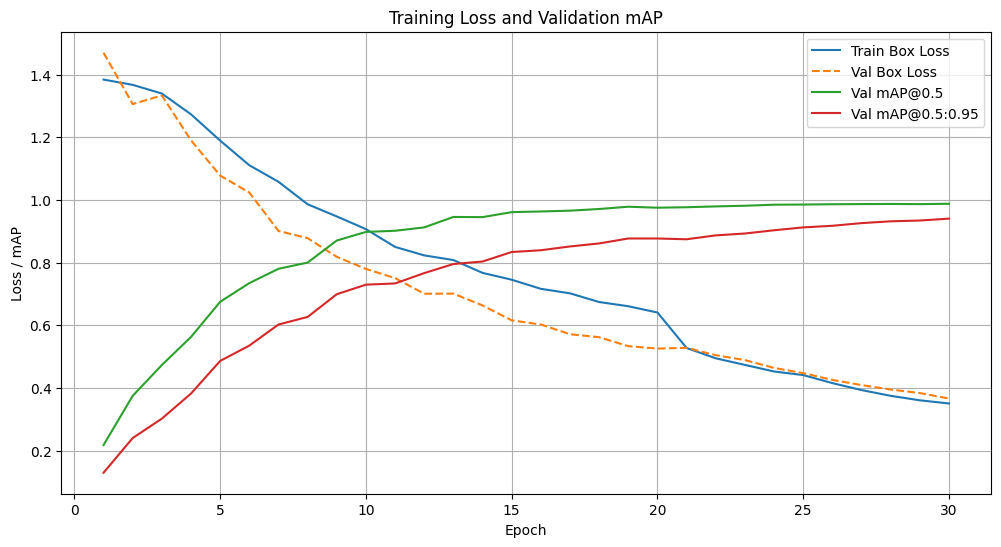

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Load results.csv from the training run
results_df = pd.read_csv('/content/drive/MyDrive/project_265_YOLOv5/YOLOv5/runs/detect/train2/results.csv')

# Print actual column names to avoid KeyErrors
print(results_df.columns)

plt.figure(figsize=(12, 6))
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Val Box Loss', linestyle='--')
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='Val mAP@0.5')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='Val mAP@0.5:0.95')

plt.xlabel('Epoch')
plt.ylabel('Loss / mAP')
plt.title('Training Loss and Validation mAP')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Test the model
print("\nTesting the model...")
test_images_dir = "/content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images"  # Path to test images directory
test_results = model.predict(
    source=test_images_dir,  # Path to test images
    save=True,               # Save predictions
    save_txt=True,           # Save predictions as text files
    save_conf=True,          # Save confidence scores
    conf=0.25,               # Confidence threshold
    iou=0.45                 # IoU threshold

)




Testing the model...

image 1/320 /content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images/ap (1)_aug_15.jpg: 448x640 4 Aerosil cans/Paint tinss, 43.5ms
image 2/320 /content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images/ap (1)_aug_5.jpg: 448x640 5 Aerosil cans/Paint tinss, 25.5ms
image 3/320 /content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images/ap (12)_aug_1.jpg: 480x640 4 Aerosil cans/Paint tinss, 63.8ms
image 4/320 /content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images/ap (12)_aug_13.jpg: 480x640 4 Aerosil cans/Paint tinss, 27.4ms
image 5/320 /content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images/ap (12)_aug_15.jpg: 480x640 4 Aerosil cans/Paint tinss, 26.0ms
image 6/320 /content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images/ap (12)_aug_5.jpg: 480x640 1 Hydraulic/Pneaumatic cylinder, 2 Aerosil cans/Paint tinss, 25.9ms
image 7/320 /content/drive/MyDrive/project_265_YOLOv5/YOLOv5/

In [7]:
metrics = model.val(split='test')  # Use test images as defined in dataset.yaml
print(metrics)


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 134.9±128.2 MB/s, size: 335.2 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1As4A4rdT4EGG8lRf4pjXATPf5lEgZD8n/YOLOv5/Yolo format/test/labels... 320 images, 0 backgrounds, 0 corrupt: 100%|██████████| 320/320 [02:03<00:00,  2.58it/s]

val: New cache created: /content/drive/.shortcut-targets-by-id/1As4A4rdT4EGG8lRf4pjXATPf5lEgZD8n/YOLOv5/Yolo format/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:09<00:00,  5.79it/s]


                   all        320       1106      0.983       0.96      0.988      0.939
          Gas Cylinder         17         95       0.96      0.958      0.979      0.936
      Fire Extingusher         32        117      0.994      0.932       0.99      0.913
Hydraulic/Pneaumatic cylinder         64        131      0.982      0.985      0.994      0.921
Aerosil cans/Paint tins         37        156      0.987      0.948      0.984      0.946
           Compressors         28        110      0.995      0.982      0.995      0.963
           Oil Filters         28         77      0.985      0.987      0.995      0.964
      Fuel tanks/ Cans         52        104      0.988      0.933      0.978      0.955
             Batteries         40        162      0.987      0.971      0.993      0.944
     Ammunition Shells         28        154      0.969      0.948      0.984      0.911
Speed: 0.7ms preprocess, 16.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to ru

In [8]:
print("\n[RESULT] Test Set Evaluation Metrics:")
print(f" - mAP@0.5:       {metrics.box.map50:.4f}")
print(f" - mAP@0.5:0.95:  {metrics.box.map:.4f}")
print(f" - Precision:     {metrics.box.mp:.4f}")
print(f" - Recall:        {metrics.box.mr:.4f}")



[RESULT] Test Set Evaluation Metrics:
 - mAP@0.5:       0.9880
 - mAP@0.5:0.95:  0.9393
 - Precision:     0.9830
 - Recall:        0.9604


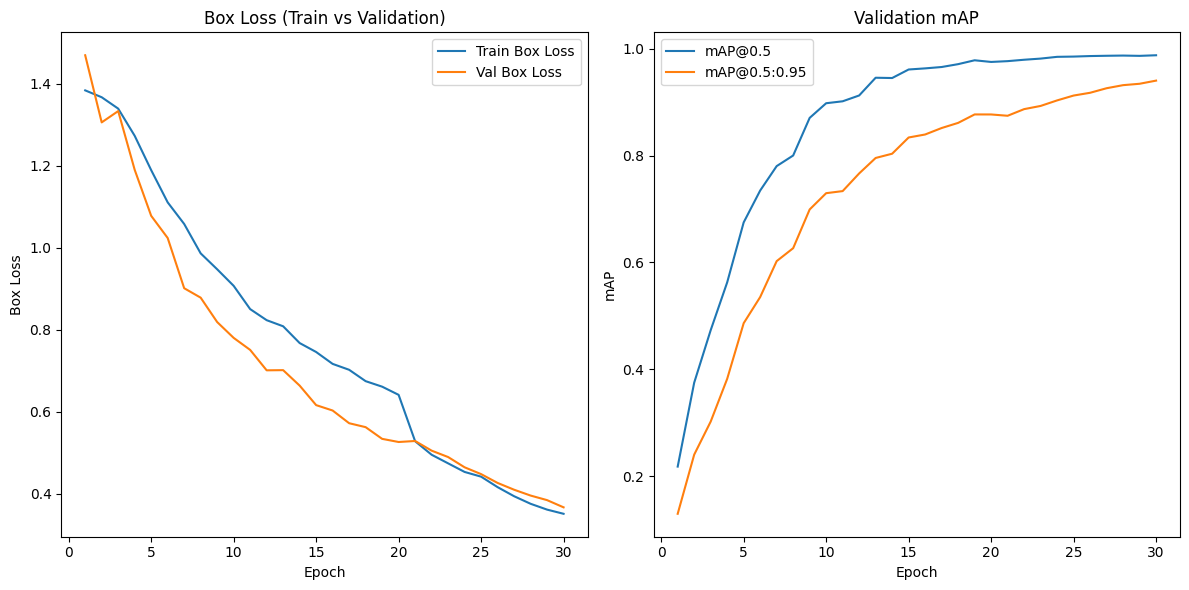

In [9]:
plt.figure(figsize=(12, 6))

# Plot box loss
plt.subplot(1, 2, 1)
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Val Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.title('Box Loss (Train vs Validation)')
plt.legend()

# Plot mAP (adjust to correct column names)
plt.subplot(1, 2, 2)
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('Validation mAP')
plt.legend()

plt.tight_layout()
plt.show()


image 1/1 /content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images/g16_aug_14.jpg: 448x640 15 Gas Cylinders, 25.6ms
Speed: 2.7ms preprocess, 25.6ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Detected Objects Count per Class:
Class 0: 15 objects


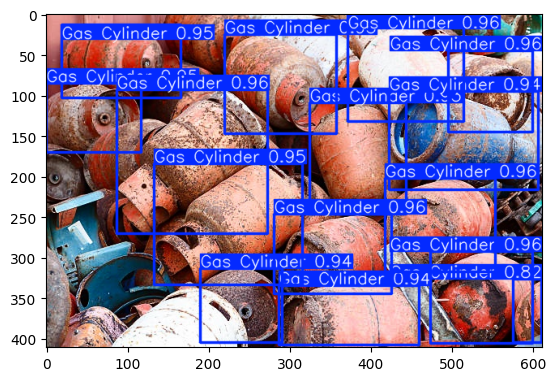


Detected Objects with Class Names:
Gas Cylinder: 15 objects


In [23]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the trained YOLOv8 model (assuming you have a trained model)
# model = YOLO('/content/drive/MyDrive/yolov8_trained_model/best.pt')  # Path to your trained model

# Step 2: Make predictions on an image (single or batch)
image_path = '/content/drive/MyDrive/project_265_YOLOv5/YOLOv5/Yolo format/test/images/g16_aug_14.jpg'  # Path to an image for inference
results = model.predict(image_path, conf = 0.30)  # Make predictions on the image

# Step 3: Count the number of objects for each class
detected_classes = results[0].boxes.cls.cpu().numpy()  # Extract class IDs from predictions

# Count the occurrences of each class
class_counts = {}
for cls in detected_classes:
    class_counts[int(cls)] = class_counts.get(int(cls), 0) + 1

# Print the count of objects per class
print("Detected Objects Count per Class:")
for class_id, count in class_counts.items():
    print(f"Class {class_id}: {count} objects")

# Step 4: Optionally, show the image with bounding boxes and labels
# Visualize the results
plt.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))
plt.show()
# Access the Results object from the list
results = results[0] # Get the Results object from the list

# Additional: You can use the class names from your dataset.yaml for better output
class_names = results.names  # If you want class names instead of IDs

print("\nDetected Objects with Class Names:")
for class_id, count in class_counts.items():
    print(f"{class_names[class_id]}: {count} objects")


In [12]:
print(f"Final Training Results Summary:")
print(f"📉 Final Train Box Loss: {results_df['train/box_loss'].iloc[-1]:.4f}")
print(f"📉 Final Val Box Loss: {results_df['val/box_loss'].iloc[-1]:.4f}")
print(f"✅ Final Val mAP@0.5: {results_df['metrics/mAP50(B)'].iloc[-1]:.4f}")
print(f"✅ Final Val mAP@0.5:0.95: {results_df['metrics/mAP50-95(B)'].iloc[-1]:.4f}")

print("\n[INFO] For test set:")
print(f"✅ Test mAP@0.5: {metrics.box.map50:.4f}")
print(f"✅ Test mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"✅ Test Precision: {metrics.box.mp:.4f}")
print(f"✅ Test Recall: {metrics.box.mr:.4f}")


Final Training Results Summary:
📉 Final Train Box Loss: 0.3505
📉 Final Val Box Loss: 0.3663
✅ Final Val mAP@0.5: 0.9879
✅ Final Val mAP@0.5:0.95: 0.9405

[INFO] For test set:
✅ Test mAP@0.5: 0.9880
✅ Test mAP@0.5:0.95: 0.9393
✅ Test Precision: 0.9830
✅ Test Recall: 0.9604
